## Other Computer Vision Problems

### Multi-Label Classification

#### The Data

In [1]:
from fastai.vision.all import *

In [2]:
# download and untar some images
path = untar_data(URLs.PASCAL_2007)

In [3]:
# this time we have a file with the labels
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


#### Constructing a DataBlock

In [4]:
datablock = DataBlock()

In [5]:
datasets = datablock.datasets(df)

In [6]:
len(datasets.train), len(datasets.valid)

(4009, 1002)

In [7]:
# inspect first data item
x, y = datasets[0]
x, y

(fname       000005.jpg
 labels           chair
 is_valid          True
 Name: 0, dtype: object,
 fname       000005.jpg
 labels           chair
 is_valid          True
 Name: 0, dtype: object)

In [10]:
# constructing a data block with dependent and independent variables
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')

datablock = DataBlock(get_x=get_x, get_y=get_y)
datasets = datablock.datasets(df)
datasets.train[0]

(Path('/Users/chhilty/.fastai/data/pascal_2007/train/002937.jpg'), ['car'])

In [21]:
# for converting the paths to images fastai has some help
datablock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                     get_x=get_x, get_y=get_y)
datasets = datablock.datasets(df)
datasets.train[0]

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]))

In [22]:
# see what the underlying vocab is
idxs = torch.where(datasets.train[0][1]==1.)[0]
datasets.train.vocab[idxs]

(#1) ['cat']

In [23]:
datasets.train[0][1]

TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [24]:
# because the validation samples are marked we use these
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  splitter=splitter,
                  get_x=get_x, get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]))

In [26]:
# now we add our same resizing to ensure all the images are the same size
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  splitter=splitter,
                  get_x=get_x, get_y=get_y,
                  item_tfms=RandomResizedCrop(128, min_scale=.35))
dls = dblock.dataloaders(df)

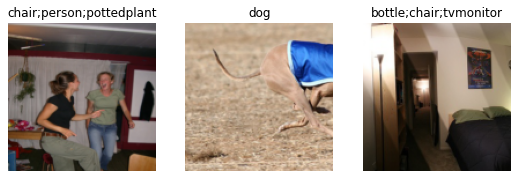

In [27]:
# inspect a batch
dls.show_batch(nrows=1, ncols=3)